In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import re
# from scipy import signal
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
data = pd.read_csv('data_scaled.csv')

In [4]:
data.head()

,x,y,z,activity
0,0.457376,0.689453,0.421540,Walking
1,0.438482,0.717446,0.420169,Walking
2,0.544191,0.755916,0.477840,Walking
3,0.487291,0.800191,0.390204,Walking
4,0.391350,0.836838,0.224368,Walking


In [5]:
X = data[['x', 'y', 'z']]
y = data['activity']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# RFC

In [7]:
import time
start=time.time()
rf = RandomForestClassifier(n_estimators=500,max_depth=20,n_jobs=-1)
rf.fit(X_train, y_train)
stop=time.time()
print(stop-start)

211.23246121406555


In [8]:
y_pred = rf.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7627547283283345


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_good = label_encoder.fit_transform(y_train)
y_test_good = label_encoder.fit_transform(y_test)

In [11]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

                             precision    recall  f1-score   support

             Brushing Teeth       0.91      0.88      0.89      7168
                   Clapping       0.84      0.84      0.84      6607
     Dribbling (Basketball)       0.49      0.47      0.48      6326
          Drinking from Cup       0.95      0.97      0.96      8228
               Eating Chips       0.94      0.92      0.93      7962
               Eating Pasta       0.88      0.90      0.89      7384
            Eating Sandwich       0.95      0.96      0.95      8266
                Eating Soup       0.91      0.93      0.92      8218
            Folding Clothes       0.69      0.72      0.70      6700
                    Jogging       0.59      0.63      0.61      7215
      Kicking (Soccer Ball)       0.34      0.20      0.25      6214
Playing Catch w/Tennis Ball       0.41      0.43      0.42      6221
                    Sitting       0.97      0.97      0.97      7264
                     Stairs      

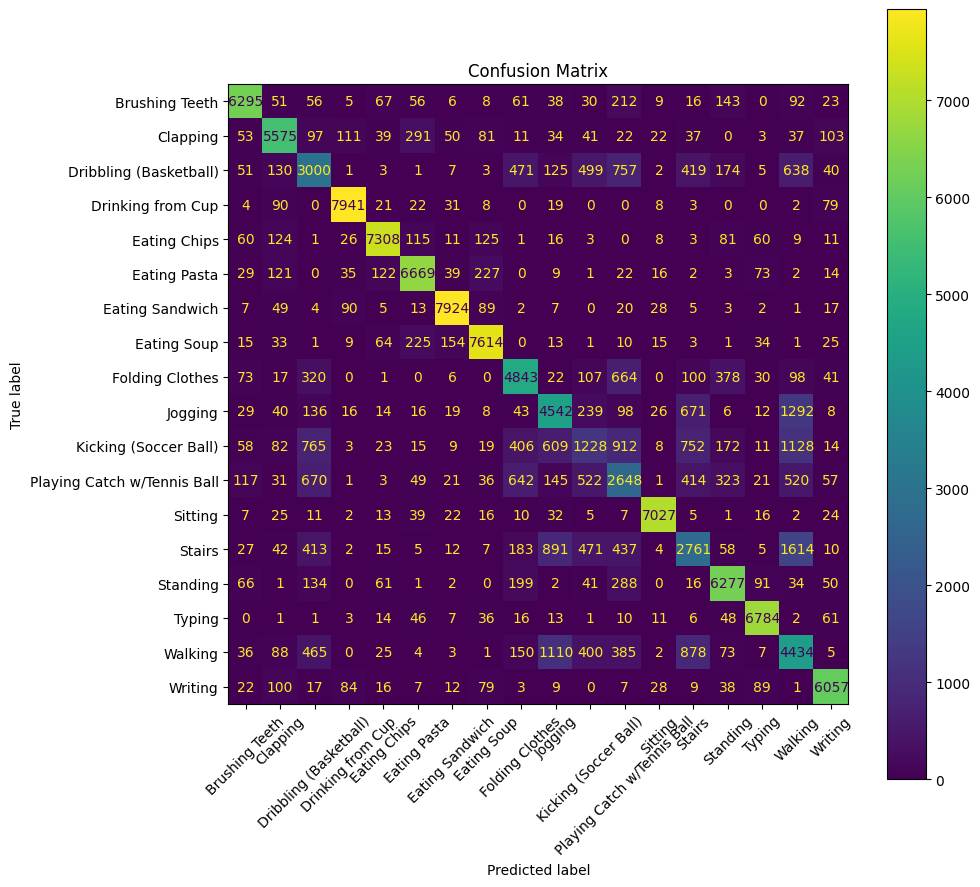

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Oblicz macierz konfuzji
cm = confusion_matrix(y_test, y_pred)

# Stwórz obiekt wyświetlania macierzy konfuzji
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Zwiększenie rozmiaru wykresu i dostosowanie etykiet
fig, ax = plt.subplots(figsize=(10, 10))  # Dopasuj rozmiar (zmień 10, 10 na większe, jeśli potrzeba)
disp.plot(ax=ax, cmap='viridis', xticks_rotation=45)  # Rotacja etykiet osi X
plt.title("Confusion Matrix")
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV
# param_grid = [
#  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
#  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
#  ]
param_grid = [
 {'n_estimators': [30,100], 'max_depth': [5,10,None]},
 # {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

In [14]:
forest_reg = RandomForestClassifier(n_jobs=-1)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='accuracy')

In [15]:
grid_search.fit(X_train, y_train_good)

C:\Users\alicj\PycharmProjects\StudioProjektowe1\.venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
grid_search.best_params_


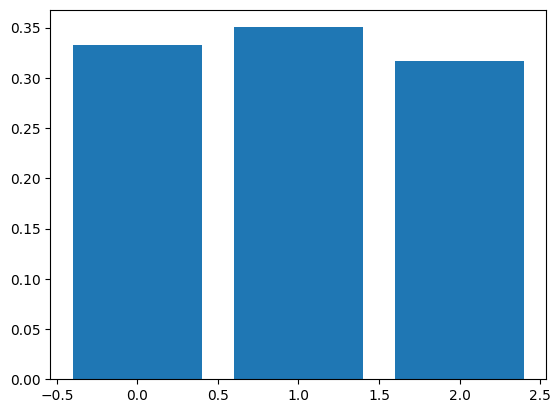

In [16]:
import matplotlib.pyplot as plt
feature_importances = rf.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.show()


In [107]:
# data.drop(index=648481,inplace=True)

In [17]:
list=data.activity.unique()
list=list.tolist()
list.pop()
filtered_data = data[~data['activity'].isin(list)]


### 648481 było dziwne!!

In [18]:
filtered_data

,x,y,z,activity
648481,0.376213,0.707355,0.446003,Kicking (Soccer


In [19]:
# data.drop(648481)

,x,y,z,activity
0,0.457376,0.689453,0.421540,Walking
1,0.438482,0.717446,0.420169,Walking
2,0.544191,0.755916,0.477840,Walking
3,0.487291,0.800191,0.390204,Walking
4,0.391350,0.836838,0.224368,Walking
...,...,...,...,...
648476,0.344261,0.735545,0.396024,Kicking (Soccer Ball)
648477,0.360121,0.717057,0.395314,Kicking (Soccer Ball)
648478,0.366672,0.696569,0.394383,Kicking (Soccer Ball)
648479,0.368145,0.692913,0.399536,Kicking (Soccer Ball)


In [20]:
data.shape

(648482, 4)

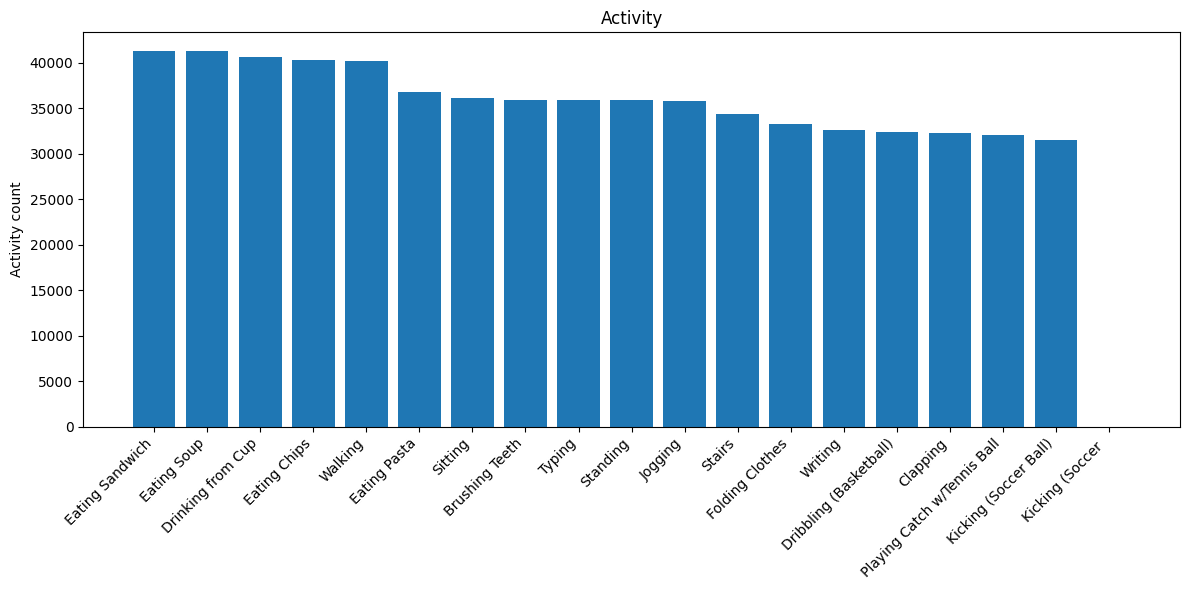

In [21]:
fig = plt.figure(figsize=(12, 6))
labels = []
label_counts = []
# Place keys and values into list to maintain order.
for k, v in data.activity.value_counts(dropna=False).items():
    labels.append(k)
    label_counts.append(v)
y = np.arange(len(labels))
plt.bar(y, label_counts )
plt.xticks(y, labels, rotation=45, ha="right")
plt.xticks(y, labels)
plt.ylabel('Activity count')
plt.title('Activity')
plt.tight_layout()
plt.show()
fig.savefig('plot')

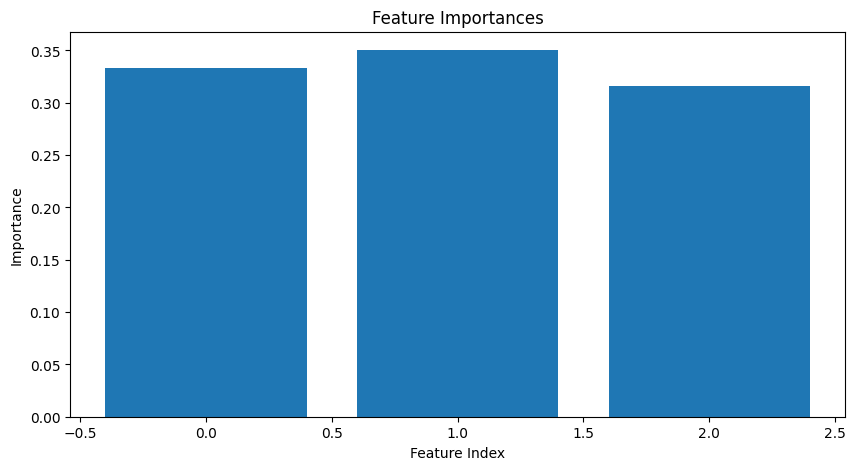

In [22]:
import matplotlib.pyplot as plt

# Istotność cech
feature_importances = rf.feature_importances_

plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_importances)), feature_importances)
plt.title("Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


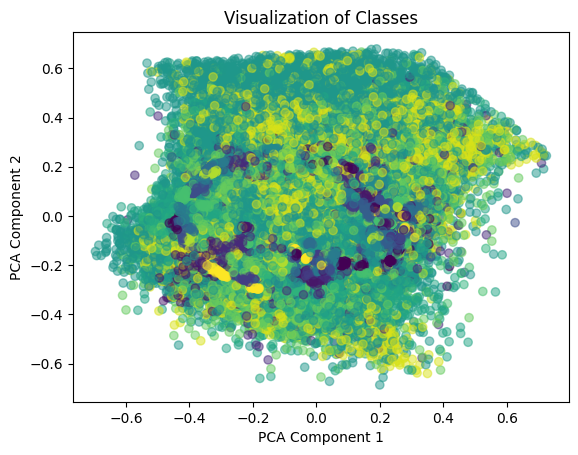

In [133]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_good, cmap='viridis', alpha=0.5)
plt.title("Visualization of Classes")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [34]:
y_train_good

array([13, 13,  6, ...,  6, 18, 14])

In [35]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_good, cmap='viridis', alpha=0.5)
plt.title("t-SNE Visualization of Classes")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


KeyboardInterrupt: 

# CNN

In [23]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [24]:
from tensorflow import keras
from keras.layers import Conv1D, GlobalAveragePooling1D, GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout, Flatten
from keras import Model as Model_
from keras import regularizers

# define a model structure
class CNN_Model(Model_):
  def __init__(self):
    super(CNN_Model, self).__init__()
    self.conv1 = Conv1D(32, 3, activation='relu')
    self.maxpool = MaxPooling1D()
    self.conv2 = Conv1D(32, 3, activation='relu')
    self.globalmaxpool = GlobalMaxPooling1D()
    self.dropout = Dropout(0.2)
    self.outputLayer = Dense(6, activation='softmax')

  # to use the model
  def call(self, input_x):
    output = input_x
    output = self.conv1(output)
    output = self.maxpool(output)
    output = self.conv2(output)
    output = self.globalmaxpool(output)
    output = self.dropout(output)
    return self.outputLayer(output)

In [37]:
model  = CNN_Model()

# compile the model
model.compile(
    optimizer=keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.CategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.CategoricalAccuracy(name='accuracy')],
)

# training
print("Fit model on training data")
history = model.fit(
    X_train,
    y_train_good,
    batch_size=64,
    epochs=25,
    validation_data=(X_test, y_test_good),
)

Fit model on training data
Epoch 1/25


ValueError: Exception encountered when calling CNN_Model.call().

[1mInput 0 of layer "conv1d_2" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 3)[0m

Arguments received by CNN_Model.call():
  • input_x=tf.Tensor(shape=(None, 3), dtype=float32)

In [43]:
y_train_good

array([13, 13,  6, ...,  6, 18, 14])